## Neural Network Algorithms

- [Importable source code (most up-to-date version)](https://github.com/sylvaticus/Bmlt.jl/blob/master/src/Nn.jl) - [Julia Package](https://github.com/sylvaticus/Bmlt.jl)
- [Demonstrative static notebook](https://github.com/sylvaticus/Bmlt.jl/blob/master/notebooks/Nn.ipynb)
- [Demonstrative live notebook](https://mybinder.org/v2/gh/sylvaticus/Bmlt.jl/master?filepath=notebooks%2FNn.ipynb) (temporary personal online computational environment on myBinder) - it can takes minutes to start with!
- Theory based on [MITx 6.86x - Machine Learning with Python: from Linear Models to Deep Learning](https://github.com/sylvaticus/MITx_6.86x) ([Unit 3](https://github.com/sylvaticus/MITx_6.86x/blob/master/Unit%2003%20-%20Neural%20networks/Unit%2003%20-%20Neural%20networks.md))
- New to Julia? [A concise Julia tutorial](https://github.com/sylvaticus/juliatutorial) - [Julia Quick Syntax Reference book](https://julia-book.com)


In [1]:
using Pkg
if ! haskey(Pkg.installed(), "StatsPlots")
    Pkg.add("StatsPlots")
end
using Bmlt.Nn, Random, StatsPlots
Random.seed!(123);

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Pkg/src/Pkg.jl:531


In [81]:
# Non-linear regression

# Set Random data
xtrain = rand(300,3)
ytrain = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtrain))]
xtest  = rand(30,3)
ytest  = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtest))]

30-element Array{Float64,1}:
 1.3301695444132144
 1.5706451224194427
 1.286352071271032
 1.4108972066436885
 1.5307485720992826
 1.6233089178778721
 1.255006541962994
 1.3817956600393557
 1.2870481501191897
 1.4724008691567758
 1.8206344969761432
 1.1473409977389823
 1.4642647192038323
 ⋮
 1.3401767685816561
 1.4182056671313887
 1.557614449880249
 1.5160240082285774
 1.1851474319088862
 1.2228260590873523
 1.2621829468389025
 1.2053704076548348
 1.534913458621736
 1.154724992498303
 1.254195676528948
 1.879637195409806

In [144]:
# Define the network
l1   = DenseLayer(3,2)
l2   = DenseLayer(2,2,f=relu)
l3   = DenseLayer(2,1)
mynn = buildNetwork([l1,l2,l3],squaredCost,name="Feed-forward Neural Network Model 1")

NN(Layer[DenseLayer([0.47116463852328705 0.231978128269394 0.8273548867571858; 0.25768724770035223 0.38941177418073813 0.6542553014981014], [0.12054106210760929, 0.4886652775403326], identity, nothing), DenseLayer([0.14937254330954208 0.32407420211956595; 0.5477784153317513 0.337064206625008], [0.922741244752326, 0.7753888895124228], Bmlt.Utils.relu, nothing), DenseLayer([0.4509828857650775 0.17374825068836763], [0.7707859116336757], identity, nothing)], Bmlt.Utils.squaredCost, nothing, false, "Feed-forward Neural Network Model 1")

In [145]:
# Train the network
train!(mynn,xtrain,ytrain,epochs=20,sequential=true,batchSize=8,verbosity=STD,optAlg=SGD(λ = 0.1))

***
*** Training Feed-forward Neural Network Model 1 for 20 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 8): 	 0.016608705217981842
Training.. 	 avg ϵ on (Epoch 2 Batch 8): 	 0.01571800674577091
Training.. 	 avg ϵ on (Epoch 4 Batch 8): 	 0.015182722161429907
Training.. 	 avg ϵ on (Epoch 6 Batch 8): 	 0.014855352722586765
Training.. 	 avg ϵ on (Epoch 8 Batch 8): 	 0.014604860291389042
Training.. 	 avg ϵ on (Epoch 10 Batch 8): 	 0.014398253285032653
Training.. 	 avg ϵ on (Epoch 12 Batch 8): 	 0.014222701161264397
Training.. 	 avg ϵ on (Epoch 14 Batch 8): 	 0.014070718694912098
Training.. 	 avg ϵ on (Epoch 16 Batch 8): 	 0.013937206358086304
Training.. 	 avg ϵ on (Epoch 18 Batch 8): 	 0.013818487981876586
Training.. 	 avg ϵ on (Epoch 20 Batch 8): 	 0.013711833587032832
Training of 20 epoch completed. Final epoch error: 0.010128495008315742.


(epochs = 20, ϵ_epochs = [0.038299742026835074, 0.011912618176323008, 0.011618862473876475, 0.011396846434394387, 0.011221617080360952, 0.011078881832016652, 0.010958936587008715, 0.010855636877981007, 0.010764997209767214, 0.010684310610156492  …  0.010545620829087892, 0.010485132806909452, 0.010429360329222656, 0.010377644348957148, 0.010329453861689401, 0.010284354785091432, 0.010241987775579503, 0.010202052055866117, 0.010164293393004252, 0.010128495008315742], θ_epochs = Any[])

In [146]:
avgLossTraining = loss(mynn,xtrain,ytrain)

0.010128495008315742

In [147]:
avgLossTest = loss(mynn,xtest,ytest)

0.009662577208646798

In [153]:
ŷtest  = predict(mynn,xtest)

[println("$(ytest[i]) - $(ŷtest[i])") for i in 1:size(ytest,1)];


1.3301695444132144 - 1.4186715305074684
1.5706451224194427 - 1.4234395936275397
1.286352071271032 - 1.3397553019651236
1.4108972066436885 - 1.5421350650483023
1.5307485720992826 - 1.3949830635214702
1.6233089178778721 - 1.5356706088530312
1.255006541962994 - 1.337196843347935
1.3817956600393557 - 1.412170473457608
1.2870481501191897 - 1.3515563014429053
1.4724008691567758 - 1.4897306230375587
1.8206344969761432 - 1.5469886587258856
1.1473409977389823 - 1.2517889989138014
1.4642647192038323 - 1.5044208661625673
1.1816423802268403 - 1.4101844791886509
1.720157388865425 - 1.6003987065073622
1.5486378448293459 - 1.4606196282202453
1.5555809245859358 - 1.5443406959375365
1.0972917242610025 - 1.3352970599526515
1.3401767685816561 - 1.3872691712360339
1.4182056671313887 - 1.3747898774803808
1.557614449880249 - 1.458480070994887
1.5160240082285774 - 1.41774992768496
1.1851474319088862 - 1.3815020094530996
1.2228260590873523 - 1.432087051331989
1.2621829468389025 - 1.3701010076917817
1.20537040

In [2]:
# Classification
# Load Modules

using Pkg
if ! haskey(Pkg.installed(), "StatsPlots")
    Pkg.add("StatsPlots")
end
using Bmlt.Nn, DelimitedFiles, Random, StatsPlots # Load the main module and ausiliary modules
Random.seed!(123); # Fix the random seed (to obtain reproducible results)

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Pkg/src/Pkg.jl:531


In [3]:
# Load the data
iris     = readdlm(joinpath(dirname(Base.find_package("Bmlt")),"..","test","data","iris.csv"),',',skipstart=1)
iris     = iris[shuffle(axes(iris, 1)), :] # Shuffle the records, as they aren't by default
x        = convert(Array{Float64,2}, iris[:,1:4])
y        = map(x->Dict("setosa" => 1, "versicolor" => 2, "virginica" =>3)[x],iris[:, 5]) # Convert the target column to numbers
y_oh     = oneHotEncoder(y) # Convert to One-hot representation (e.g. 2 => [0 1 0], 3 => [0 0 1])

150×3 Array{Int64,2}:
 0  0  1
 0  1  0
 0  0  1
 1  0  0
 0  1  0
 0  0  1
 1  0  0
 0  1  0
 1  0  0
 0  0  1
 0  1  0
 1  0  0
 1  0  0
 ⋮     
 0  0  1
 1  0  0
 0  0  1
 0  0  1
 0  0  1
 0  1  0
 0  0  1
 1  0  0
 0  0  1
 0  0  1
 1  0  0
 1  0  0

In [4]:
# Split the data in training/testing sets
ntrain    = Int64(round(size(x,1)*0.8))
xtrain    = x[1:ntrain,:]
ytrain    = y[1:ntrain]
ytrain_oh = y_oh[1:ntrain,:]
xtest     = x[ntrain+1:end,:]
ytest     = y[ntrain+1:end]

30-element Array{Int64,1}:
 1
 1
 1
 3
 2
 1
 2
 3
 2
 1
 1
 2
 1
 ⋮
 3
 1
 3
 3
 3
 2
 3
 1
 3
 3
 1
 1

In [5]:
# Define the Artificial Neural Network model
l1   = DenseLayer(4,10,f=relu) # Activation function is ReLU
l2   = DenseLayer(10,3)        # Activation function is identity by default
l3   = VectorFunctionLayer(3,3,f=softMax) # Add a (parameterless) layer whose activation function (softMax in this case) is defined to all its nodes at once
mynn = buildNetwork([l1,l2,l3],squaredCost,name="Multinomial logistic regression Model Sepal") # Build the NN and use the squared cost (aka MSE) as error function



NN(Layer[DenseLayer([0.4448473974235778 0.7952795525190997 0.026630169029809192 0.48374511338226545; 0.8708043872171827 0.549177646959319 0.35351707933247467 0.37414220887867367; … ; 0.2468742257189167 0.45309782444222346 0.7530361910318599 0.6680044390676352; 0.7302847937931838 0.2817792814190183 0.734625171895988 0.41035359780714153], [0.8491400326738596, 0.8781081898575815, 0.49288417708213417, 0.28200030597190695, 0.7475336528883536, 0.9322394637280857, 0.5453108634360695, 0.5279166556286568, 0.4199116560732432, 0.3911113968092621], Bmlt.Utils.relu, nothing), DenseLayer([0.934735250247736 0.9340593737200877 … 0.8597361111134243 0.7327665163172745; 0.7526653055860766 0.9954143376141116 … 0.8251004681838026 0.4309787680445192; 0.12464042169793044 0.4867137505073533 … 0.49068283665460766 0.9341084584658972], [0.12307146580635342, 0.8138161240578448, 0.9195596744262988], identity, nothing), VectorFunctionLayer(3, 3, Bmlt.Utils.softMax, nothing)], Bmlt.Utils.squaredCost, nothing, false,

In [6]:
# Training it (default to SGD)
res = train!(mynn,scale(xtrain),ytrain_oh,epochs=100,batchSize=6) # Use optAlg=SGD (Stochastic Gradient Descent) by default

***
*** Training Multinomial logistic regression Model Sepal for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 6): 	 0.08969137191707083


Training the Neural Network...  1%|▎                    |  ETA: 0:35:16

Training.. 	 avg ϵ on (Epoch 10 Batch 6): 	 0.021292988444075105
Training.. 	 avg ϵ on (Epoch 20 Batch 6): 	 0.0006408736009663337
Training.. 	 avg ϵ on (Epoch 30 Batch 6): 	 0.011386011885907972
Training.. 	 avg ϵ on (Epoch 40 Batch 6): 	 0.002366076568314456
Training.. 	 avg ϵ on (Epoch 50 Batch 6): 	 0.0022538071905395716
Training.. 	 avg ϵ on (Epoch 60 Batch 6): 	 0.0005788539926992816
Training.. 	 avg ϵ on (Epoch 70 Batch 6): 	 0.018852578386890136
Training.. 	 avg ϵ on (Epoch 80 Batch 6): 	 0.0030484376556182877
Training.. 	 avg ϵ on (Epoch 90 Batch 6): 	 0.0047427813199884235


Training the Neural Network...100%|█████████████████████| Time: 0:00:22


Training.. 	 avg ϵ on (Epoch 100 Batch 6): 	 0.004274141162623497
Training of 100 epoch completed. Final epoch error: 0.018005527563194.


(epochs = 100, ϵ_epochs = [0.39779131105200266, 0.1679035313318478, 0.07644772783039212, 0.060332364480115024, 0.04040021728507128, 0.037947604191619126, 0.03888846922976149, 0.031610959844693094, 0.02984987372569329, 0.028852867252784478  …  0.01820145207313611, 0.018178925769540645, 0.018156770211453583, 0.018133294651181367, 0.018111548096508424, 0.01808932057947398, 0.018067760939322365, 0.01804903160554596, 0.018027031606033358, 0.018005527563194], θ_epochs = Any[])

In [7]:
# Test it
ŷtrain        = predict(mynn,scale(xtrain))   # Note the scaling function
ŷtest         = predict(mynn,scale(xtest))
trainAccuracy = accuracy(ŷtrain,ytrain,tol=1) # 0.983
testAccuracy  = accuracy(ŷtest,ytest,tol=1)   # 1.0

1.0

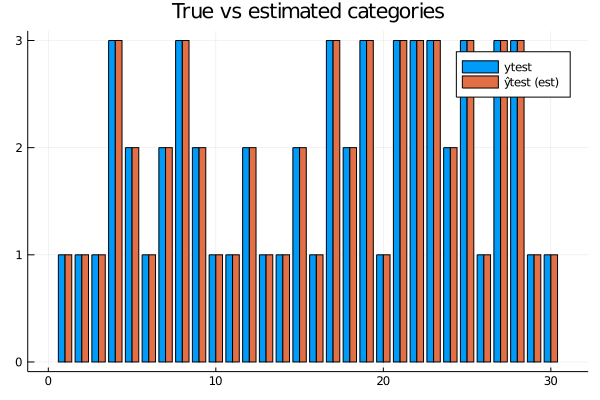

In [9]:
# Visualise results
testSize = size(ŷtest,1)
ŷtestChosen =  [argmax(ŷtest[i,:]) for i in 1:testSize]
groupedbar([ytest ŷtestChosen], label=["ytest" "ŷtest (est)"], title="True vs estimated categories") # All records correctly labelled !

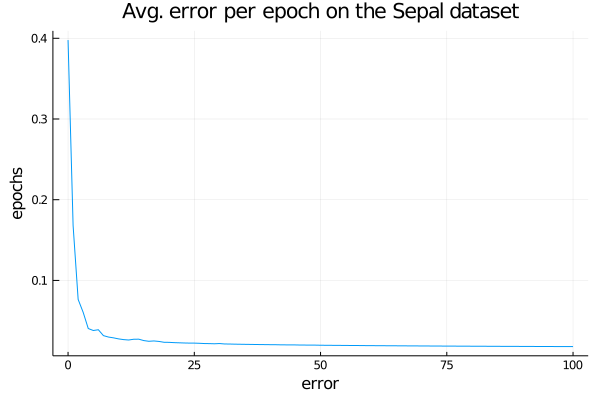

In [10]:
plot(0:res.epochs,res.ϵ_epochs, ylabel="epochs",xlabel="error",legend=nothing,title="Avg. error per epoch on the Sepal dataset")